# Steady-state and Transient Response

This chapter is concerned with steady-state and transient analysis of control systems.

The second-order system response and its relationship to the closed-loop poles and zeros is revised. The effect of an additional zero or an additional pole on the 2<sup>nd</sup> order response is examined and pole-zero cancellation is discussed.

System type-number and its relationship to steady-state error response is revised.

## Reading

You should read sections 4.2 **Time Domain Criteria** and 4.1 **Steady-State Criteria** of the [Handout](/eglm03-textbook/handouts/csd) **Control System Design Methods, Compensation Strategies and Design Criteria**.

## Transient Performance

### A Second-Order System

![a second order system](images/fig1.png)

Where are the system poles and what does the model 2nd Order response look like for each of these cases?



$\omega_n$ | $\zeta$
-----------|---------
3          | 3
3          | 1
3          | 0.8
3          | 0.5
3          | 0


### Effect of Damping on 2nd Order Response


In [5]:
wn = 3;
z = [3, 2.5, 2, 1.5, 1, 0.9, 0.8, 1/sqrt(2), 0.5, 0.4, 0.3, 0.2, 0.1, 0];


G =
 
        9
  --------------
  s^2 + 15 s + 9
 
Continuous-time transfer function.



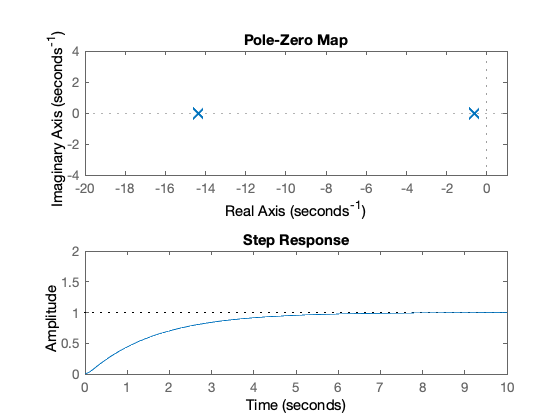

In [6]:
zeta = z(2);
G = tf(wn^2, [1, 2*zeta*wn, wn^2])
subplot(211),pzmap( G),axis([-20, 1, -4, 4])
subplot(212),step( G),axis([0,10,0,2])

Or download and run this script [second_resp.m](second_resp.m) in MATLAB.

![model 2nd order response](images/fig2.png)

### How do the natural frequency and damping ratio relate to pole locations?


 $$T(s) = \frac{\omega _n^2}{s^2 + \zeta {\omega _n}s + \omega _n^2}$$
 

$$\begin{eqnarray*}{P_{1,2}} &=&  - \zeta  \pm {\omega _n}\sqrt {1 - {\zeta ^2}}\\
 &=& - {\sigma _d} \pm j{\omega _d}\end{eqnarray*}$$

 ![pole locations](images/fig3.png)

### How do the transient performance criteria map to the closed loop poles?

#### Settling time $T_s$

Settling time is related to relative stability and speed of response.

1% settling time:

$$T_s \approx \frac{4.6}{\sigma_d}$$

![Design region for 1% settling time](images/fig4.png)

#### Rise Time $T_r$

Rise time is related to speed of response

$$T_r \approx \frac{1.8}{\omega_n}$$

![Design region for specified rise time](images/fig5.png)

#### Percentage overshoot (%OS or $M_p$)

Percentage overshoot is related to damping

$$M_p = \exp\left(\frac{-\pi\zeta}{\sqrt{1-\zeta^2}}\right)\times 100$$

$$M_p \approx \left( 1 - \frac{\zeta }{0.6} \right) \times 100\;{\kern 1pt} 0 \leqslant \zeta  \leqslant 0.6$$


![Design region for specified Percentage Overshoot](images/fig6.png)

#### Combined constraints

* If system has inadequate rise time (too slow) we must raise the natural frequency
* If system has too much overshoot we need to increase damping
* If transient persists too long, move the poles further to the left in the s-plane


![Design area for combined constraints](images/fig7.png)

### What if the system is not second order?

* What is the effect of an extra zero?

* What is the effect of an extra pole?

* What if there are many poles and zeros?

#### Effect of an Extra Zero

First normalize transfer function:

$$G(s) = \frac{C(s)}{R(s)}=\frac{1}{\left(\frac{2}{\omega_n}\right)^2+2\zeta\left(\frac{s}{\omega_n}\right)+1}$$

Then add a zero

$$G(s) = \frac{C(s)}{R(s)}=\frac{\left(\frac{s}{\alpha\zeta\omega_n}\right)+1}{\left(\frac{2}{\omega_n}\right)^2+2\zeta\left(\frac{s}{\omega_n}\right)+1}$$

Note that $\alpha$ is a multiplier of the real part of the complex poles $\zeta\omega_n$.

#### 2nd order system with extra zero

Matlab demo (run [zero2nd.m](zero2nd.m)):

clf
wn = 10;
zeta = 0.7;
t = 0:0.01:2;
s = tf('s');
Tc = tf(1/((s/wn)^2 + 2*zeta*(s/wn) + 1))

Tc =
 
          1000
  ---------------------
  10 s^2 + 140 s + 1000
 
Continuous-time transfer function.

[c]=step(Tc,t);
plot(t,c,'r-')
title('Effect of an additional zero on model 2nd order response')
ylabel('Controlled variable C(t)')
xlabel('Normalised time wn t')
hold on
for alpha = [100,50,10,8,6,4,3,2,1.5,1,0.5]

   T2 = tf((s/(alpha*zeta*wn)+1)/((s/wn)^2 + 2*zeta*(s/wn) + 1));
   [c,t]=step(T2,t);
   if (alpha == 4)
   plot(t,c,'b-')
end

   T2 = tf((s/(alpha*zeta*wn)+1)/((s/wn)^2 + 2*zeta*(s/wn) + 1));
   [c,t]=step(T2,t);
   if (alpha == 4)
   plot(t,c,'b-')
end

   T2 = tf((s/(alpha*zeta*wn)+1)/((s/wn)^2 + 2*zeta*(s/wn) + 1));
   [c,t]=step(T2,t);
   if (alpha == 4)
   plot(t,c,'b-')
end

   T2 = tf((s/(alpha*zeta*wn)+1)/((s/wn)^2 + 2*zeta*(s/wn) + 1));
   [c,t]=step(T2,t);
   if (alpha == 4)
   plot(t,c,'b-')
end

   T2 = tf((s/(alpha*zeta*wn)+1)/((s/wn)^2 + 2*zeta*(s/wn) + 1));

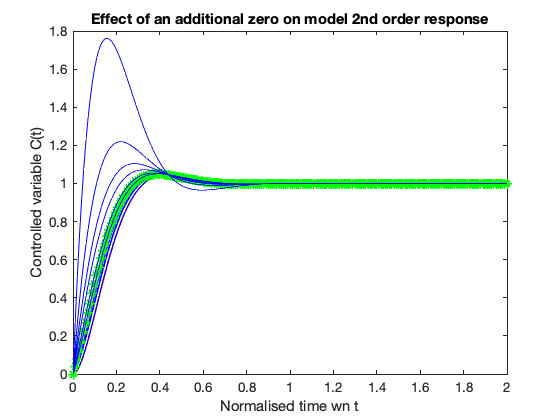

In [7]:
zero2nd

![result](images/fig8.png)

Design curves (see handout):

![design curves -- effect of an extra zero](images/fig9.png)

#### .. how about adding an extra pole?

$$G(s) = \frac{C(s)}{R(s)} = \frac{1}{\left( \left( \frac{s}{\alpha \zeta \omega _n} \right) + 1 \right)\left( \left( \frac{s}{\omega _n} \right)^2 + 2\zeta \left( \frac{s}{\omega _n} \right) + 1 \right)}$$

Note that $\alpha$ is a multiplier of the real part of the complex poles.


#### 2nd order system with extra pole

Matlab demo (run [pole2nd.m](pole2nd.m)):

clf
wn = 10;
zeta = 0.7;
t = 0:0.01:2;
s = tf('s');
Tc = tf(1/((s/wn)^2 + 2*zeta*(s/wn) + 1))

Tc =
 
          1000
  ---------------------
  10 s^2 + 140 s + 1000
 
Continuous-time transfer function.

[c]=step(Tc,t);
plot(t,c,'r-')
title('Effect of an additional pole on model 2nd order response')
ylabel('Controlled variable C(t)')
xlabel('Normalised time wn t')
hold on

for alpha = [100,50,10,8,6,4,3,2,1.5,1,0.5]
   T2 = tf(1/((s/(alpha*zeta*wn)+1)*((s/wn)^2 + 2*zeta*(s/wn) + 1)));
   [c,t]=step(T2,t);
   if (alpha == 4)
   plot(t,c,'b-')
end
   T2 = tf(1/((s/(alpha*zeta*wn)+1)*((s/wn)^2 + 2*zeta*(s/wn) + 1)));
   [c,t]=step(T2,t);
   if (alpha == 4)
   plot(t,c,'b-')
end
   T2 = tf(1/((s/(alpha*zeta*wn)+1)*((s/wn)^2 + 2*zeta*(s/wn) + 1)));
   [c,t]=step(T2,t);
   if (alpha == 4)
   plot(t,c,'b-')
end
   T2 = tf(1/((s/(alpha*zeta*wn)+1)*((s/wn)^2 + 2*zeta*(s/wn) + 1)));
   [c,t]=step(T2,t);
   if (alpha == 4)
   plot(t,c,'b-')
end
   T2 = tf(1/((s/(alpha*zeta*wn)+1)*((s/wn)^2 + 2*zet

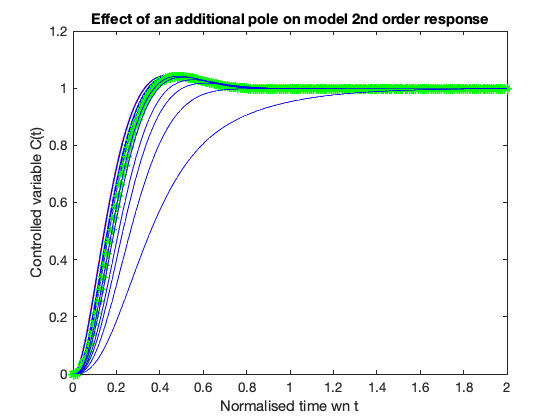

In [8]:
pole2nd

![result](images/fig10.png)

Design curves (see handout):

![design curves -- effect of an extra pole](images/fig11.png)

### Dominant poles and order reduction

Because the time response of many real systems will be dominated by two or three low frequency poles, a complex high order system can often be simplified by ignoring the effects of high-frequency poles and zeros or a pole that is effectively cancelled by a zero. This MATLAB script file demonstrates this.

Matlab demo (Run [reduction.m](reduction.m))

In this example we ignore any poles or zeros that are located 4 or more times the real part of the dominant poles $s = -1 \pm j$ or poles that a cancelled by a closed-loop zero and see that the seventh order system is effectively only a third-order system.

In [9]:
sigma = 1;
wd = 1;
disp('Full order system')
zeros = [-6*sigma; -3.2*sigma]
poles = [-9*sigma
   -7*sigma+j*2*wd
   -7*sigma-j*2*wd
   -3*sigma
   -2*sigma
   -sigma+j*wd
   -sigma-j*wd]
g = zpk(zeros,poles,prod(abs(poles))/prod(abs(zeros)));

Full order system

zeros =

   -6.0000
   -3.2000


poles =

  -9.0000 + 0.0000i
  -7.0000 + 2.0000i
  -7.0000 - 2.0000i
  -3.0000 + 0.0000i
  -2.0000 + 0.0000i
  -1.0000 + 1.0000i
  -1.0000 - 1.0000i



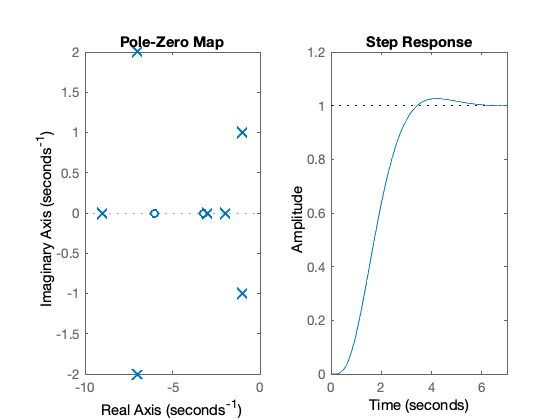

In [10]:
subplot(121)
pzmap(poles,zeros)
subplot(122)
step(g)

Now remove redundant terms

Step 1: remove high frequency pole at $-9*\sigma$

In [11]:
z1 = zeros
p1 = poles(2:7)
g1 = zpk(z1,p1,prod(abs(p1))/prod(abs(z1)));


z1 =

   -6.0000
   -3.2000


p1 =

  -7.0000 + 2.0000i
  -7.0000 - 2.0000i
  -3.0000 + 0.0000i
  -2.0000 + 0.0000i
  -1.0000 + 1.0000i
  -1.0000 - 1.0000i



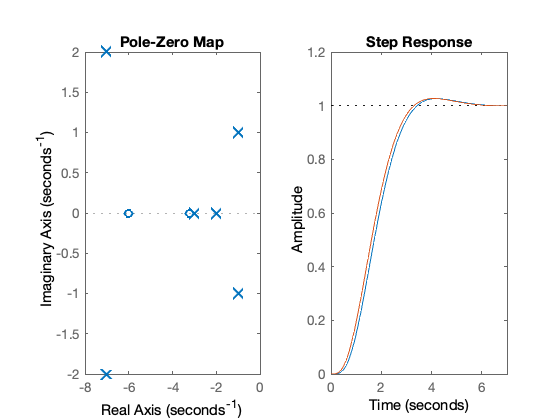

In [12]:
subplot(121)
pzmap(p1,z1)
subplot(122)
step(g,g1)

Step 2: remove complex hf pole pair

In [13]:
z2 = z1
p2 = p1(3:6)
g2 = zpk(z2,p2,prod(abs(p2))/prod(abs(z2)));


z2 =

   -6.0000
   -3.2000


p2 =

  -3.0000 + 0.0000i
  -2.0000 + 0.0000i
  -1.0000 + 1.0000i
  -1.0000 - 1.0000i



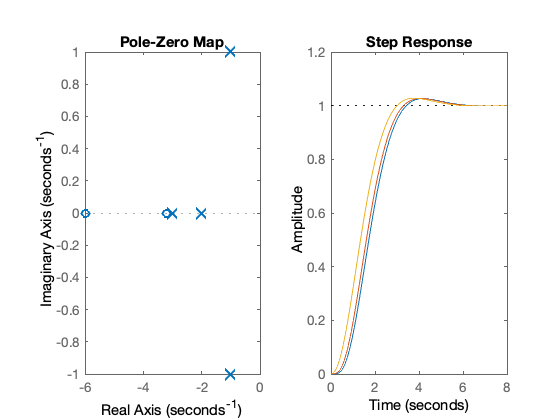

In [14]:
subplot(121)
pzmap(p2,z2)
subplot(122)
step(g,g1,g2)

Step 3: remove hf zero

In [15]:
z3= z2(2)
p3 = p2
g3 = zpk(z3,p3,prod(abs(p3))/prod(abs(z3)));


z3 =

   -3.2000


p3 =

  -3.0000 + 0.0000i
  -2.0000 + 0.0000i
  -1.0000 + 1.0000i
  -1.0000 - 1.0000i



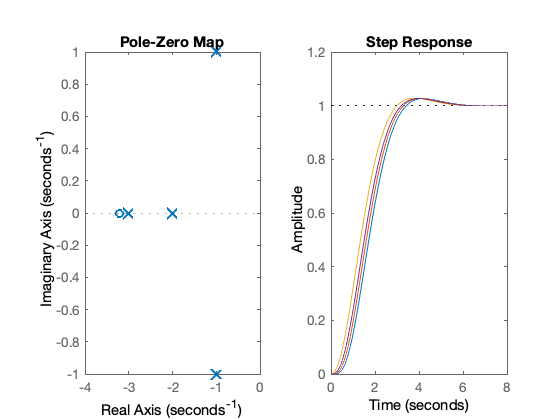

In [16]:
subplot(121)
pzmap(p3,z3)
subplot(122)
step(g,g1,g2,g3)

Step 4: remove pole-zero cancellation terms

In [17]:
z4= []
p4 = p3(2:4)
g4 = zpk(z4,p4,prod(abs(p4))/prod(abs(z4)));


z4 =

     []


p4 =

  -2.0000 + 0.0000i
  -1.0000 + 1.0000i
  -1.0000 - 1.0000i



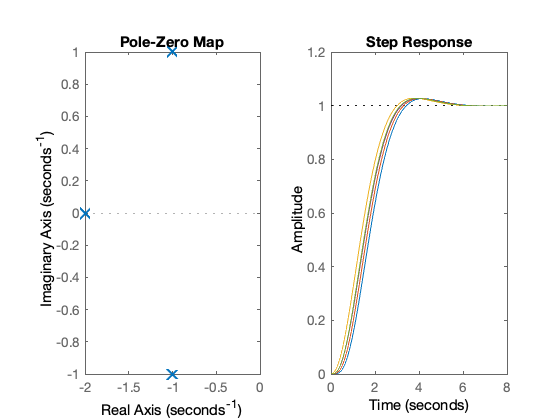

In [18]:
subplot(121)
pzmap(p4,z4)
subplot(122)
step(g,g1,g2,g3,g4)

Step 5: remove last non-dominant pole')

In [19]:
z5 = z4
p5 = p4(2:3)
g5 = zpk(z5,p5,prod(abs(p5))/prod(abs(z5)));


z5 =

     []


p5 =

  -1.0000 + 1.0000i
  -1.0000 - 1.0000i



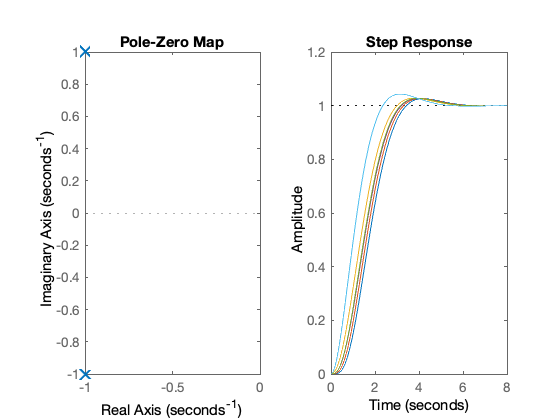

In [20]:
subplot(121)
pzmap(p5,z5)
subplot(122)
step(g,g1,g2,g3,g4,g5)

Original system

In [21]:
g


g =
 
                298.12 (s+6) (s+3.2)
  -------------------------------------------------
  (s+9) (s+3) (s+2) (s^2 + 2s + 2) (s^2 + 14s + 53)
 
Continuous-time zero/pole/gain model.



Reduced order system

In [22]:
g4


g4 =
 
           4
  --------------------
  (s+2) (s^2 + 2s + 2)
 
Continuous-time zero/pole/gain model.



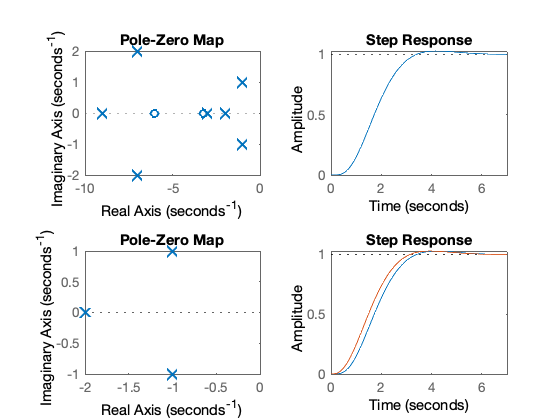

In [23]:
subplot(221)
pzmap(poles,zeros)
subplot(222)
step(g)
subplot(223)
pzmap(p4,z4)
subplot(224)
step(g,g4)

What are the steady-state performance criteria?

## Steady-state response

* Canonical system
* Disturbance rejection
* System type for non-unity gain feedback

### Canonical System

(unity-gain feedback)

![Canonical system with unity gain feedback](images/fig12.png)

$$E(s) = R(s) - C(s)$$

$$E(s) = \frac{G_o(s)}{1 + G_o(s)}R(s)$$

### Steady-state Performance

For a unity-gain negative feedback system with open-loop transfer function Go(s) the steady-state error (SSE) response of the closed-loop system is related to system type number according to the table shown below.

<table>
    <thead style="font-weight:bold;background-color:Gainsboro;">
        <tr>
            <td colspan="2">
                &nbsp;
            </td>
            <td colspan="3">
                System Type Number
            </td>
         </tr>
         <tr>
             <td colspan="2">
                &nbsp;
            </td>
            <td>
                Type 0
            </td>
            <td>
                Type 1
            </td>
            <td>
                Type 2
            </td>
         </tr>
         <tr>
             <td>
                Type of input 
            </td>
            <td>
                SSE
            </td>
            <td>
                Step
            </td>
            <td>
                Velocity
            </td>
            <td>
                Acceleration
            </td>
         </tr>
    </thead>
    <tbody>
        <tr>
            <td>Step</td><td style="width:20ex">$$\frac{1}{1+K_p}$$</td><td style="width:20ex">$$\frac{1}{1+K_p}$$</td><td style="width:20ex">$\infty$</td><td style="width:20ex">$\infty$</td>
        </tr>
        <tr>
            <td>Ramp</td><td>$$\frac{1}{K_v}$$</td><td>$$0$$</td><td>$$\frac{1}{K_v}$$</td><td>$\infty$</td>
        </tr>
        <tr>
            <td>Parabola</td><td>$$\frac{1}{K_a}$$</td><td>$$0$$</td><td>$$0$$</td><td>$$\frac{1}{K_a}$$</td>
        </tr>

    </tbody>
</table>

Where

Position error constant for step input: $R(s) = 1/s$:

$$K_p = \lim_{s\to\infty}\;G_0(s)$$

Velocity error constant for ramp input: $R(s) = 1/s^2$:

$$K_v = \lim_{s\to\infty}\;sG_0(s)$$

Acceleration error constant for parabolic input: $R(s) = 1/s^3$:

$$K_v = \lim_{s\to\infty}\;s^2G_0(s)$$

## Special Cases

For these models calculate the error response ($E(s) = G_o(s)N_d(s)$ for the "disturbance rejection" case and 
$E(s) = R(s) - C(s)$ for the "non-unity-gain-feedback") case and use the final value theorem to calculate the steady state step error. 

Compare your result with the result of the simulation.

You should note that in both cases the plant transfer function has type number 1. Do the rules of system type number as you understand them carry over to these special cases?

### Disturbance rejection? (Compliance)

Assuming that the system is originally at steady-state ($E(s) = R(s) - C(s) = 0$) what is the steady-state error to a step change in the disturbance in $n_d(t)$? ($N_d(s) = 1/s$)

![A system to illustrate compliance](images/fig13.png)

[Model file [disturbance_rejection.mdl](disturbance_rejection.mdl)]

In [24]:
disturbance_rejection


### Non-unity gain feedback

![A system to illustrate non-unity gain feedback](images/fig14.png)

[Model file [non_unity_gain_feedback.mdl](non_unity_gain_feedback.mdl)]

In [25]:
non_unity_gain_feedback

## Further Reading

The [System Metrics](https://en.wikibooks.org/wiki/Control_Systems/System_Metrics) section of the [Control Systems Wikibook](https://en.wikibooks.org/wiki/Control_Systems) amplifies some of the topics covered in this chapter.

The topics covered in this chapter are also amplified in

* Nise. Chapter 4: Time Response.
* Dorf and Bishop. Chapter 5: The Performance of Feedback Control Systems.